# Zomato Case Study

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [19]:
dataframe = pd.read_csv('D:\Atomcamp Bootcamp DATA SCIENCES - Cohort 5\EDA\ASG 4\zomato_restaurants_in_India.csv')

## Checking and removing duplicates

In [20]:
dataframe.duplicated().sum()

151527

In [22]:
df = dataframe.drop_duplicates(keep='first')
df.duplicated().sum()

0

## Exploring Data

In [23]:
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [24]:
df.tail()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,...,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [25]:
df.shape

(60417, 26)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60417 entries, 0 to 211942
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                60417 non-null  int64  
 1   name                  60417 non-null  object 
 2   establishment         60417 non-null  object 
 3   url                   60417 non-null  object 
 4   address               60399 non-null  object 
 5   city                  60417 non-null  object 
 6   city_id               60417 non-null  int64  
 7   locality              60417 non-null  object 
 8   latitude              60417 non-null  float64
 9   longitude             60417 non-null  float64
 10  zipcode               12548 non-null  object 
 11  country_id            60417 non-null  int64  
 12  locality_verbose      60417 non-null  object 
 13  cuisines              59947 non-null  object 
 14  timings               59347 non-null  object 
 15  average_cost_for_two  6

In [27]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [28]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,6.041700e+04,60417.000000,60417.000000,60417.000000,60417.0,60417.000000,60417.000000,60417.000000,60417.000000,60417.000000,60398.0,60417.000000,60417.0
mean,1.309335e+07,3418.302183,21.349431,76.588040,1.0,538.304517,1.730821,3.032868,261.574888,194.247414,0.0,-0.371799,-1.0
std,8.132809e+06,5179.351720,41.187998,10.600514,0.0,593.852227,0.880462,1.440751,728.284194,705.682451,0.0,0.925249,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.000488e+06,7.000000,16.324755,74.654029,1.0,200.000000,1.000000,2.900000,7.000000,1.000000,0.0,-1.000000,-1.0
50%,1.869150e+07,26.000000,22.320884,77.135310,1.0,400.000000,1.000000,3.500000,42.000000,11.000000,0.0,-1.000000,-1.0
75%,1.886666e+07,11295.000000,26.744389,79.928190,1.0,600.000000,2.000000,4.000000,207.000000,82.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [29]:
df.describe(include='object')

,name,establishment,url,address,city,locality,zipcode,locality_verbose,cuisines,timings,currency,highlights,rating_text
count,60417,60417,60417,60399,60417,60417,12548,60417,59947,59347,60417,60417,60417
unique,41100,27,55568,50657,99,3731,1311,3910,9382,7740,1,31455,39
top,Domino's Pizza,['Quick Bites'],https://www.zomato.com/mumbai/candy-and-green-...,"Laxman Jhula, Tapovan, Rishikesh",Chennai,Civil Lines,0,"Gomti Nagar, Lucknow",North Indian,11 AM to 11 PM,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",Good
freq,406,15477,9,37,2612,804,2915,315,4587,7678,60417,925,17569


<Axes: >

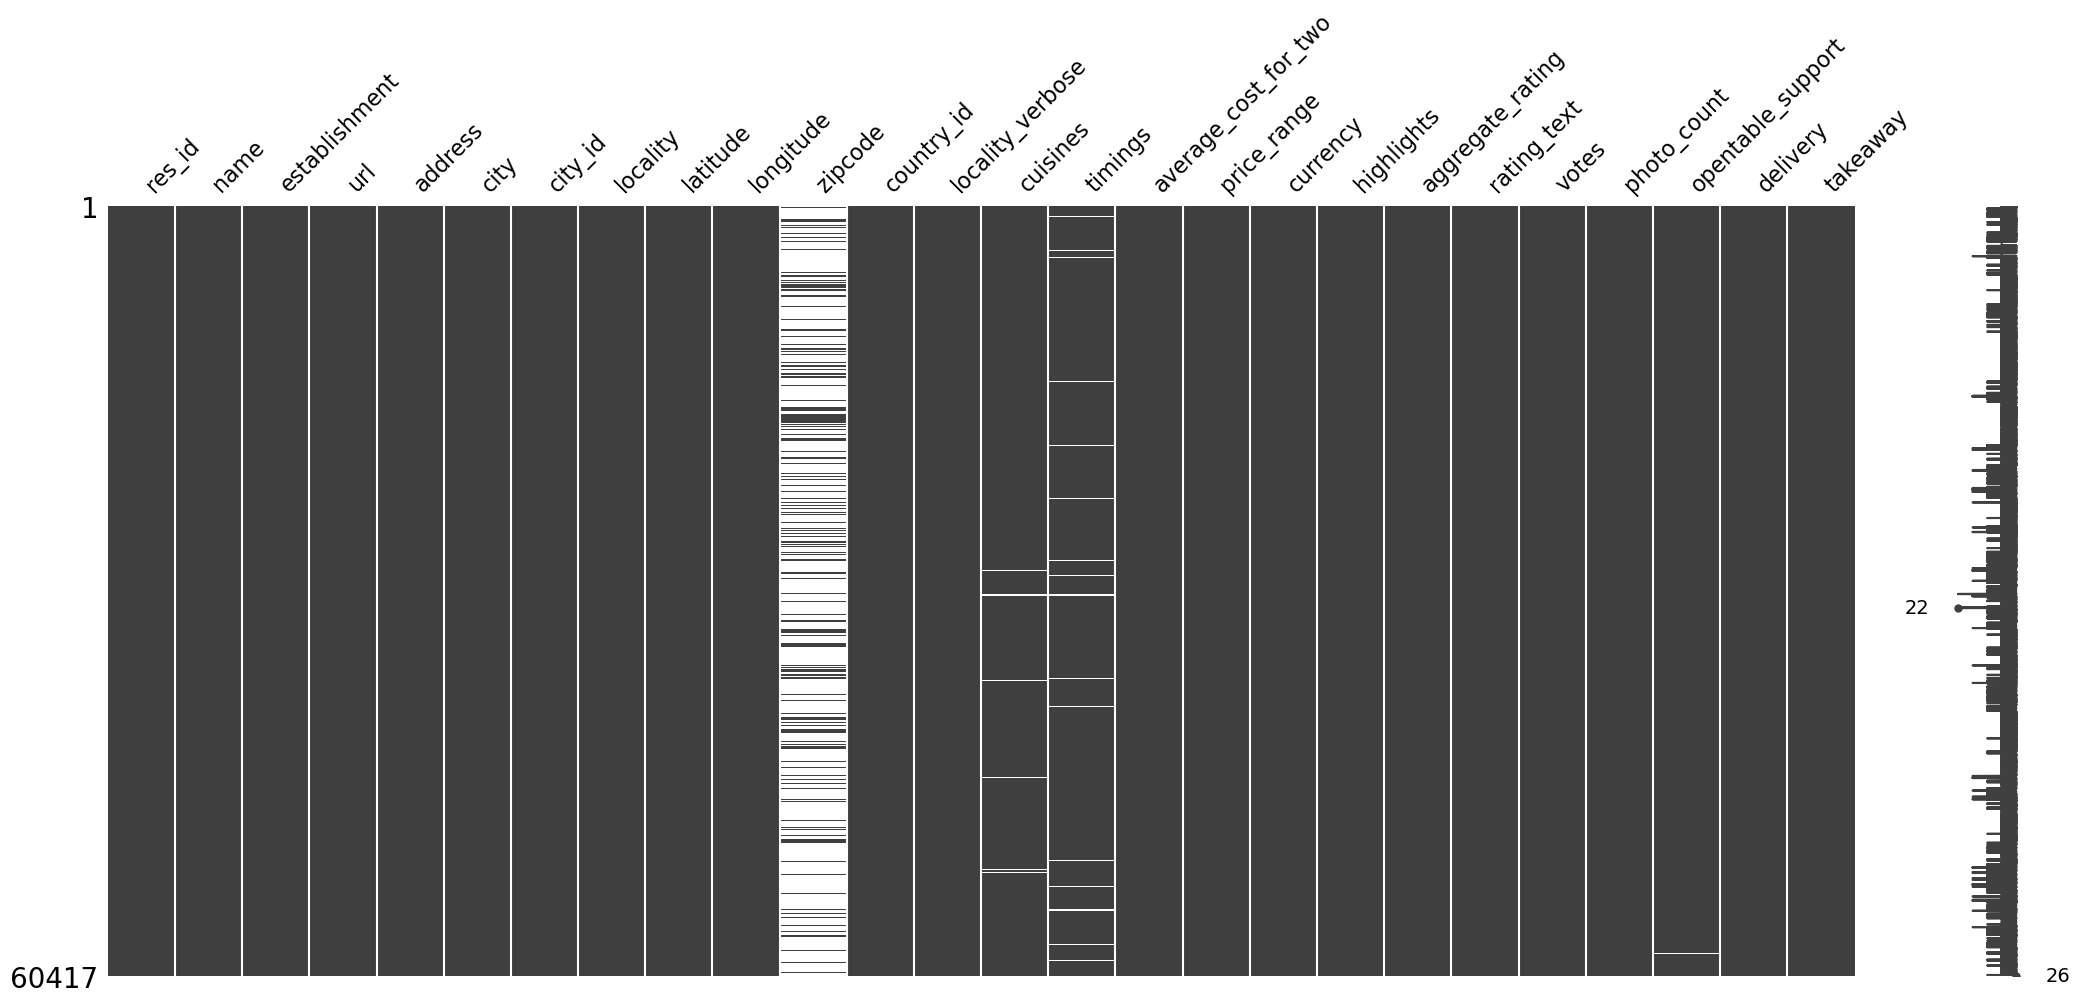

In [30]:
msno.matrix(df)

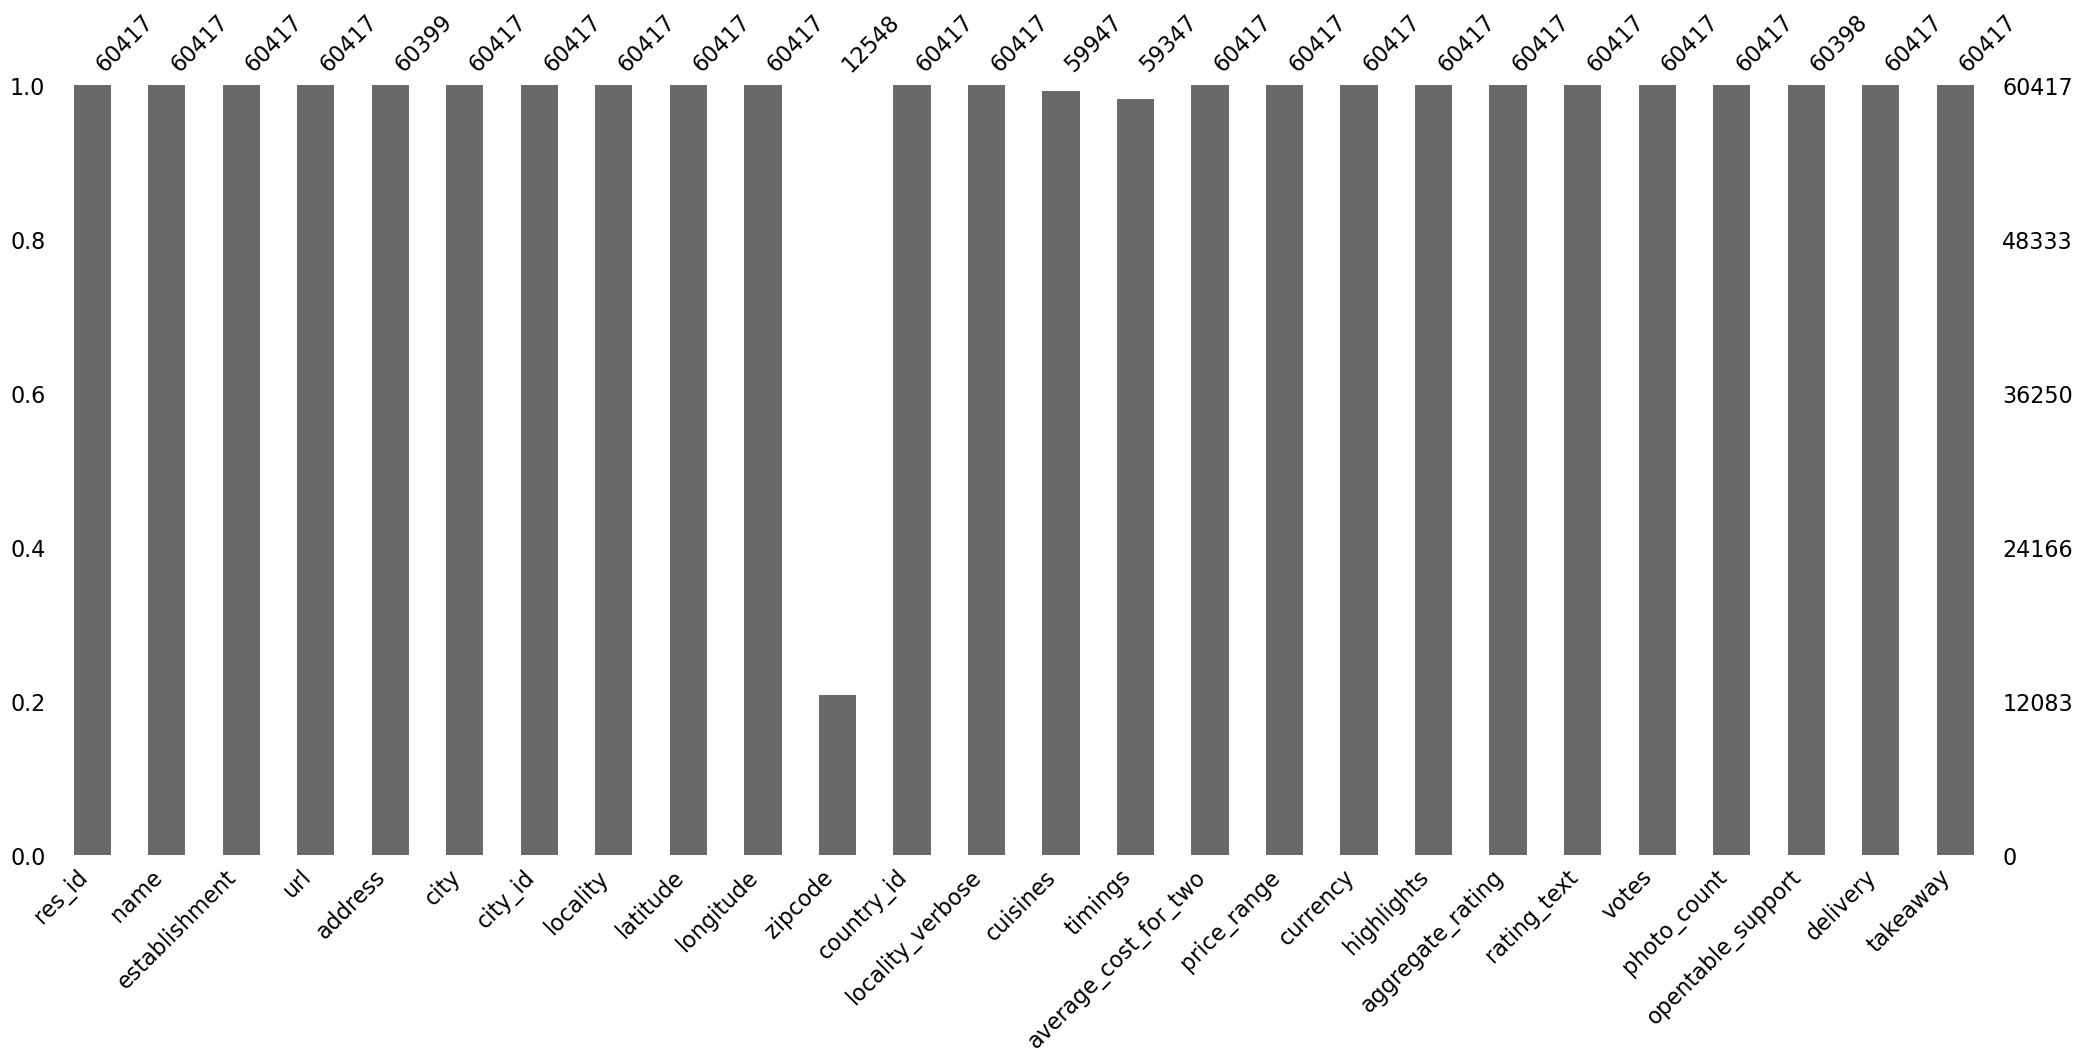

In [31]:
bar = msno.bar(df)

In [34]:
df.isnull().mean()*100

res_id                   0.000000
name                     0.000000
establishment            0.000000
url                      0.000000
address                  0.029793
city                     0.000000
city_id                  0.000000
locality                 0.000000
latitude                 0.000000
longitude                0.000000
zipcode                 79.231011
country_id               0.000000
locality_verbose         0.000000
cuisines                 0.777927
timings                  1.771025
average_cost_for_two     0.000000
price_range              0.000000
currency                 0.000000
highlights               0.000000
aggregate_rating         0.000000
rating_text              0.000000
votes                    0.000000
photo_count              0.000000
opentable_support        0.031448
delivery                 0.000000
takeaway                 0.000000
dtype: float64

1. Data in Zipcode is significantly missing, hence will be dropped.
2. Data in address, cuisines, timings, and opetnable_table support is slightly missing.

## Checking and Handling missing values

In [35]:
#Dropping zipcode column

df.drop(['zipcode'],axis=1,inplace=True)

In [40]:
df[['address','city','latitude','longitude']]

,address,city,latitude,longitude
0,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,27.211450,78.002381
1,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,27.160569,78.011583
2,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,27.182938,77.979684
3,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,27.205668,78.004799
4,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,27.157709,78.052421
...,...,...,...,...
211882,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,22.270516,73.196408
211925,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,22.310563,73.171163
211926,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,22.317731,73.168107
211940,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,22.322455,73.197203


In [42]:
#Using 'Latitude' and 'longitude' coloumn to fill in the missing addresses

from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_geocoder")

def reverse_geocode(lat, lon):
    location = geolocator.reverse((lat, lon), exactly_one=True)
    return location.address if location else None

for index, row in df.iterrows():
    if pd.isnull(row['address']):
        address = reverse_geocode(row['latitude'], row['longitude'])
        df.at[index, 'address'] = address

In [46]:
#Formulating imputational data for cuisines column

df['cuisines'].value_counts

<bound method IndexOpsMixin.value_counts of 0         North Indian, South Indian, Mithai, Street Foo...
1         North Indian, Mughlai, Rolls, Chinese, Fast Fo...
2                                         Fast Food, Mithai
3                 Desserts, Bakery, Fast Food, South Indian
4                        North Indian, Continental, Italian
                                ...                        
211882                                            Ice Cream
211925                      Gujarati, North Indian, Chinese
211926                                Gujarati, Street Food
211940                                            Fast Food
211942                           Fast Food, Sandwich, Salad
Name: cuisines, Length: 60417, dtype: object>

In [48]:
df['cuisines'].isnull().sum()

470

In [49]:
df['cuisines'].nunique()

9382

In [50]:
df['cuisines'].fillna('variety', inplace=True)

In [51]:
#No nulls left
df['cuisines'].isnull().sum()

0

In [58]:
#Checking for timings column

df['timings'].unique


<bound method Series.unique of 0                                8:30am – 10:30pm (Mon-Sun)
1         12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...
2                                          9:30 AM to 11 PM
3                                      8am – 11pm (Mon-Sun)
4                                      11:30 AM to 11:30 PM
                                ...                        
211882                                 11 AM to 12 Midnight
211925                11:30 AM to 3:30 PM, 7:30 PM to 11 PM
211926                   11 AM to 3:30 PM, 7 PM to 10:30 PM
211940    4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...
211942                                         8 AM to 1 AM
Name: timings, Length: 60417, dtype: object>

In [59]:
mode_timing = df['timings'].mode()[0]
df['timings'].fillna(mode_timing, inplace=True)

In [54]:
#Checking for opentable column

df['opentable_support'].isnull().sum()

19

In [55]:
df['opentable_support'].unique()

array([ 0., nan])

In [56]:
#Dropping opentable column

df.drop(['opentable_support'], axis=1, inplace = True)

In [60]:
df.isnull().sum()

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
delivery                0
takeaway                0
dtype: int64

<Axes: >

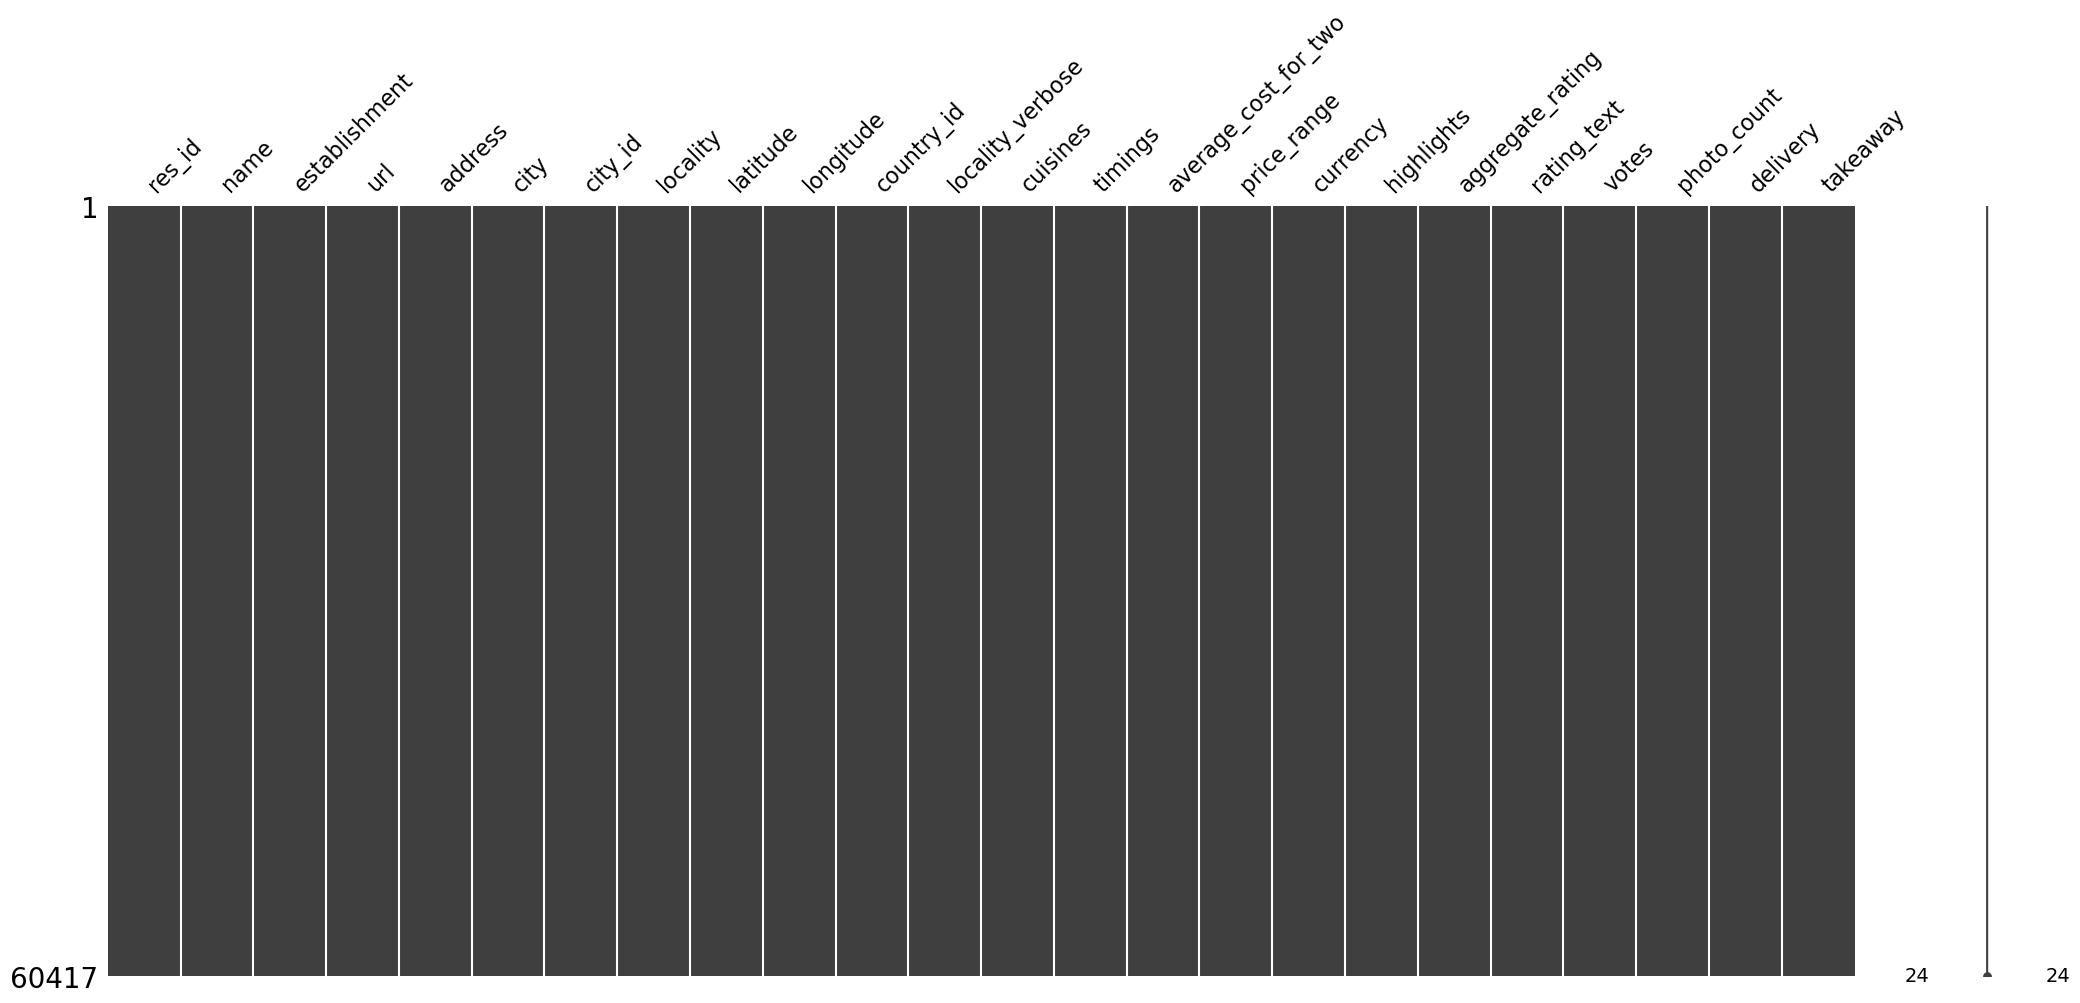

In [61]:
msno.matrix(df)

## Data Types

In [62]:
df.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
delivery                  int64
takeaway                  int64
dtype: object

## Handling Data inconsistencies

In [72]:
for column in df:
    print(column)
    print(df[column].unique())
    print('\n')

res_id
[ 3400299  3400005  3401013 ... 18019952  3200996  3201138]


name
['Bikanervala' 'Mama Chicken Mama Franky House' 'Bhagat Halwai' ...
 'Red China' 'Wah Ustad' 'Geeta lodge']


establishment
["['Quick Bites']" "['Casual Dining']" "['Bakery']" "['Café']" "['Dhaba']"
 "['Bhojanalya']" "['Bar']" "['Sweet Shop']" "['Fine Dining']"
 "['Food Truck']" "['Dessert Parlour']" "['Lounge']" "['Pub']"
 "['Beverage Shop']" "['Kiosk']" "['Paan Shop']" "['Confectionery']" '[]'
 "['Shack']" "['Club']" "['Food Court']" "['Mess']" "['Butcher Shop']"
 "['Microbrewery']" "['Cocktail Bar']" "['Pop up']" "['Irani Cafe']"]


url
['https://www.zomato.com/agra/bikanervala-khandari?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1'
 'https://www.zomato.com/agra/mama-chicken-mama-franky-house-agra-cantt?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1'
 'https://www.zomato.com/agra/bhagat-halwai-2-shahganj?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1'
 ...
 'https://www.zom

In [77]:
df['votes'].describe()

count    60417.000000
mean       261.574888
std        728.284194
min        -18.000000
25%          7.000000
50%         42.000000
75%        207.000000
max      42539.000000
Name: votes, dtype: float64

In [78]:
# transforming negative to positive values
df['votes'] = df['votes'].abs()

In [79]:
df['rating_text'].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Dobré', 'Baik', 'Sangat Baik', 'Excelente', 'Bardzo dobrze',
       'Wybitnie', 'Ottimo', 'Muito Bom', 'Velmi dobré', 'Skvělá volba',
       'Muy Bueno', 'Bom', 'İyi', 'Çok iyi', 'Harika', 'Terbaik',
       'Skvělé', 'Průměr', 'Ortalama', 'Bueno', 'Eccellente', 'Muito bom',
       'Dobrze', 'Buono', 'Média', 'Scarso', 'Promedio', 'Veľmi dobré',
       'Vynikajúce', 'Średnio', 'Priemer', 'Biasa', 'Media'], dtype=object)

In [80]:
df['rating_text'] = df['rating_text'].replace ('Dobré', 'Good').replace ('Baik', 'Good').replace('Sangat Baik', 'Very Good').replace('Sangat Baik', 'Very Good').replace('Excelente', 'Excellent').replace('Bardzo dobrze', 'Very Good').replace('Wybitnie', 'Remarkably').replace('Ottimo', 'Very Good').replace('Muito Bom', 'Very Good').replace('Velmi dobré', 'Very Good').replace('Skvělá volba', 'Good').replace('Muy Bueno', 'Very Good').replace('Bom', 'Good').replace('İyi', 'Good').replace('Çok iyi', 'Very Good').replace('Harika', 'Excellent').replace('Terbaik', 'Good').replace('Skvělé', 'Excellent').replace('Průměr', 'Average').replace('Ortalama', 'Average').replace('Bueno', 'Good').replace('Eccellente', 'Excellent').replace('Muito bom', 'Very Good').replace('Dobrze', 'Very Good').replace('Buono', 'Good').replace('Média', 'Average').replace('Scarso', 'Poor').replace('Promedio', 'Average').replace('Veľmi dobré', 'Very Good').replace('Vynikajúce', 'Excellent').replace('Średnio', 'Average').replace('Priemer', 'Very Good').replace('Biasa', 'Average').replace('Media', 'Average')
#convert all other languages into english language for better understanding of rating. 

In [81]:
df['rating_text']

0         Very Good
1         Very Good
2         Very Good
3         Very Good
4         Excellent
            ...    
211882      Average
211925    Very Good
211926         Good
211940    Very Good
211942         Good
Name: rating_text, Length: 60417, dtype: object

In [82]:
df['rating_text'].value_counts()

rating_text
Good          17702
Average       16809
Very Good     12992
Not rated     10159
Excellent      2156
Poor            591
Remarkably        8
Name: count, dtype: int64

In [83]:
df['locality_verbose'] = df['locality_verbose'].str.replace(r',\s[^,]*$', '', regex=True)

df['locality_verbose']

0            Khandari
1          Agra Cantt
2            Shahganj
3         Civil Lines
4             Tajganj
             ...     
211882      Manjalpur
211925       Alkapuri
211926       Alkapuri
211940     Karelibaug
211942          Akota
Name: locality_verbose, Length: 60417, dtype: object

In [85]:
df['timings']=df['timings'].str.replace('â€“','to',regex=False)

df['timings']

0                                8:30am – 10:30pm (Mon-Sun)
1         12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...
2                                          9:30 AM to 11 PM
3                                      8am – 11pm (Mon-Sun)
4                                      11:30 AM to 11:30 PM
                                ...                        
211882                                 11 AM to 12 Midnight
211925                11:30 AM to 3:30 PM, 7:30 PM to 11 PM
211926                   11 AM to 3:30 PM, 7 PM to 10:30 PM
211940    4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...
211942                                         8 AM to 1 AM
Name: timings, Length: 60417, dtype: object

In [92]:
df['establishment'] = df['establishment'].str.replace(r"[\[\]']", "", regex=True)
df['establishment']

0             Quick Bites
1             Quick Bites
2             Quick Bites
3             Quick Bites
4           Casual Dining
               ...       
211882    Dessert Parlour
211925      Casual Dining
211926      Casual Dining
211940        Quick Bites
211942        Quick Bites
Name: establishment, Length: 60417, dtype: object

In [104]:
cuisines = []
df["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines is", cuisines.nunique())

Total number of unique cuisines is 134


## Exploratory Data Analysis

In [93]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,delivery,takeaway
count,6.041700e+04,60417.000000,60417.000000,60417.000000,60417.0,60417.000000,60417.000000,60417.000000,60417.000000,60417.000000,60417.000000,60417.0
mean,1.309335e+07,3418.302183,21.349431,76.588040,1.0,538.304517,1.730821,3.032868,261.575583,194.247414,-0.371799,-1.0
std,8.132809e+06,5179.351720,41.187998,10.600514,0.0,593.852227,0.880462,1.440751,728.283944,705.682451,0.925249,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.0
25%,3.000488e+06,7.000000,16.324755,74.654029,1.0,200.000000,1.000000,2.900000,7.000000,1.000000,-1.000000,-1.0
50%,1.869150e+07,26.000000,22.320884,77.135310,1.0,400.000000,1.000000,3.500000,42.000000,11.000000,-1.000000,-1.0
75%,1.886666e+07,11295.000000,26.744389,79.928190,1.0,600.000000,2.000000,4.000000,207.000000,82.000000,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,1.000000,-1.0


In [94]:
df.describe(include=['object'])

,name,establishment,url,address,city,locality,locality_verbose,cuisines,timings,currency,highlights,rating_text
count,60417,60417,60417,60417,60417,60417,60417,60417,60417,60417,60417,60417
unique,41100,27,55568,50668,99,3731,3731,9383,7740,1,31455,7
top,Domino's Pizza,Quick Bites,https://www.zomato.com/mumbai/candy-and-green-...,"Laxman Jhula, Tapovan, Rishikesh",Chennai,Civil Lines,Civil Lines,North Indian,11 AM to 11 PM,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",Good
freq,406,15477,9,37,2612,804,804,4587,8748,60417,925,17702


In [96]:
df.shape

(60417, 24)

In [98]:
n_resturants = df['name'].nunique()
print("Total number of resturants is", n_resturants)

Total number of resturants is 41100


In [103]:
n_cities = df['city'].nunique()
print("Total number of cities is", n_cities)

Total number of cities is 99


## Correlation Analysis

In [100]:
# Storing numerical columns in a variable
num_df = df.select_dtypes(include=['number'])
num_df.columns

Index(['res_id', 'city_id', 'latitude', 'longitude', 'country_id',
       'average_cost_for_two', 'price_range', 'aggregate_rating', 'votes',
       'photo_count', 'delivery', 'takeaway'],
      dtype='object')

In [101]:
corr_table = num_df.corr()
corr_table

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,delivery,takeaway
res_id,1.000000,0.463902,0.009244,-0.064495,NaN,-0.196259,-0.188266,-0.253419,-0.200271,-0.090803,0.021881,NaN
city_id,0.463902,1.000000,0.012329,-0.058302,NaN,-0.210367,-0.207706,-0.266710,-0.197855,-0.173436,-0.036737,NaN
latitude,0.009244,0.012329,1.000000,0.033906,NaN,-0.002724,-0.001703,0.005960,-0.006372,-0.002636,0.007394,NaN
longitude,-0.064495,-0.058302,0.033906,1.000000,NaN,-0.012011,-0.022174,0.116439,0.023579,0.012057,0.085142,NaN
country_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_cost_for_two,-0.196259,-0.210367,-0.002724,-0.012011,NaN,1.000000,0.796594,0.255455,0.274503,0.325103,-0.056059,NaN
price_range,-0.188266,-0.207706,-0.001703,-0.022174,NaN,0.796594,1.000000,0.257688,0.255672,0.294954,-0.052452,NaN
aggregate_rating,-0.253419,-0.266710,0.005960,0.116439,NaN,0.255455,0.257688,1.000000,0.277531,0.229990,0.212771,NaN
votes,-0.200271,-0.197855,-0.006372,0.023579,NaN,0.274503,0.255672,0.277531,1.000000,0.676583,0.061343,NaN
photo_count,-0.090803,-0.173436,-0.002636,0.012057,NaN,0.325103,0.294954,0.229990,0.676583,1.000000,0.030630,NaN


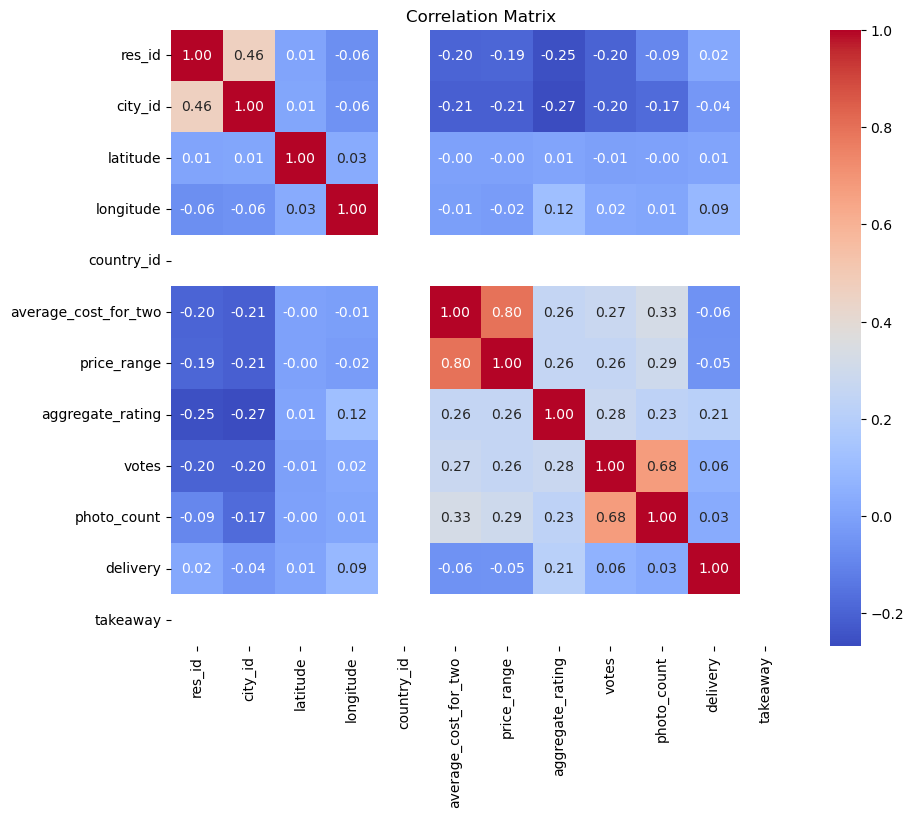

In [102]:
# Plotting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

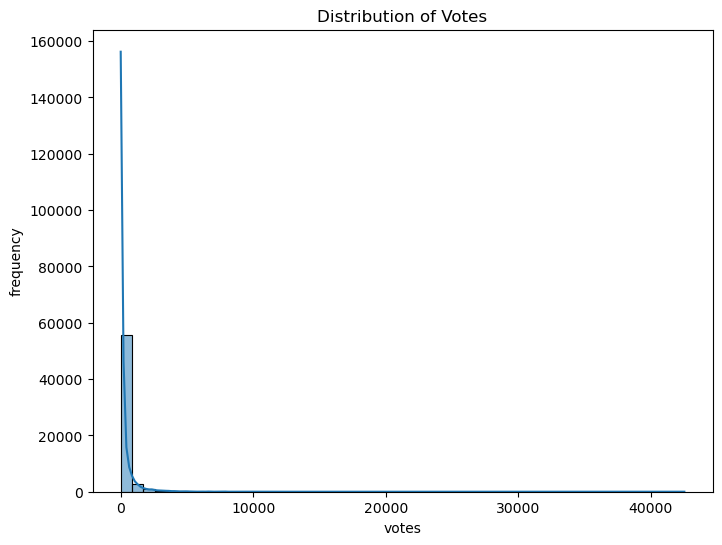

In [109]:
#For 'votes'.
plt.figure(figsize=(8,6))

sns.histplot(df['votes'],bins=50,kde=True)
plt.title('Distribution of Votes')
plt.xlabel('votes')
plt.ylabel('frequency')
plt.show()

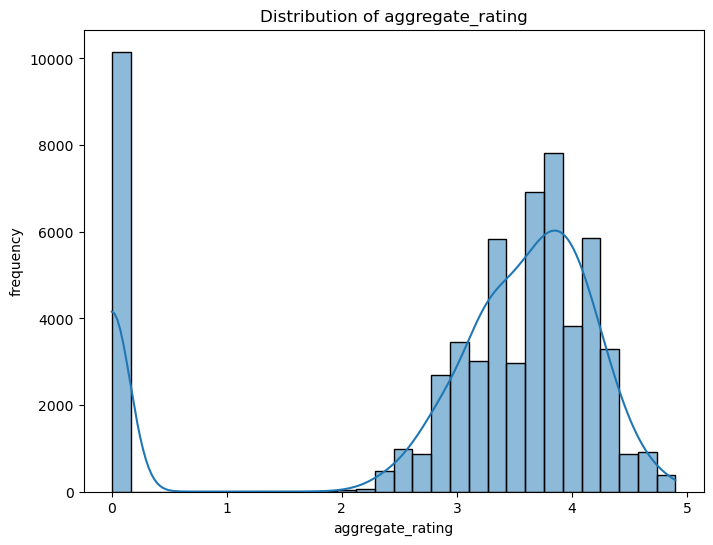

In [114]:
#For 'aggregate_rating'.
plt.figure(figsize=(8,6))

sns.histplot(df['aggregate_rating'],bins=30,kde=True)
plt.title('Distribution of aggregate_rating')
plt.xlabel('aggregate_rating')
plt.ylabel('frequency')
plt.show()

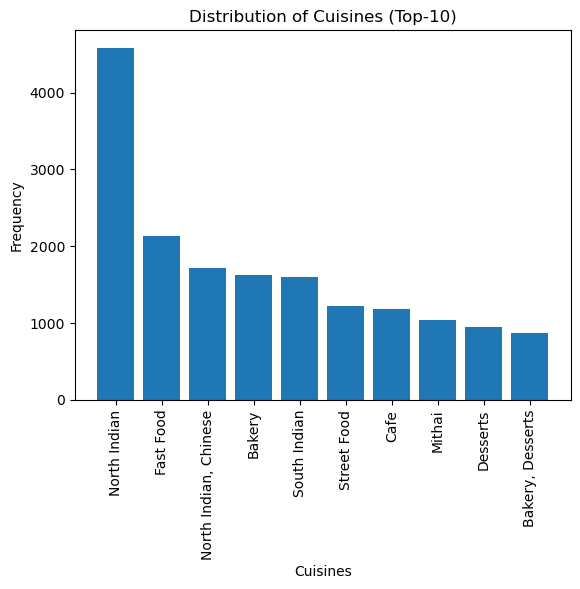

In [111]:
#For Cuisines Distribution.
top_n = 10
cuisines_cat = df['cuisines'].value_counts()[:top_n]
plt.bar(cuisines_cat.index,cuisines_cat.values)
plt.title('Distribution of Cuisines (Top-10)')
plt.xlabel('Cuisines')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

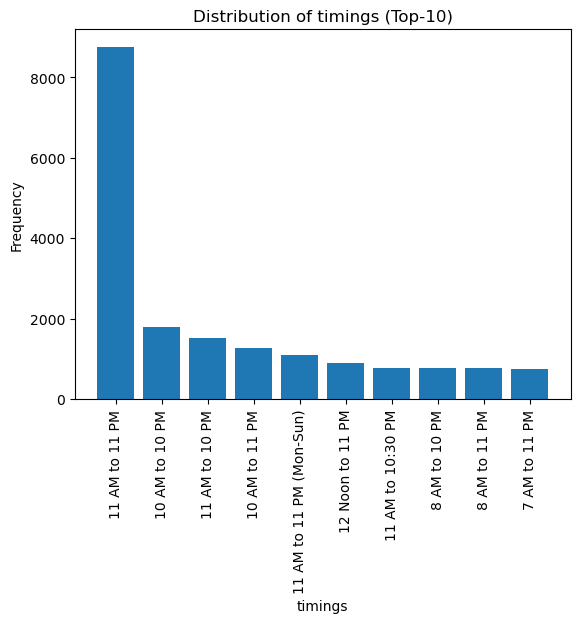

In [113]:
#For Timings Distribution.
top_n = 10
timings_cat = df['timings'].value_counts()[:top_n]
plt.bar(timings_cat.index,timings_cat.values)
plt.title('Distribution of timings (Top-10)')
plt.xlabel('timings')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

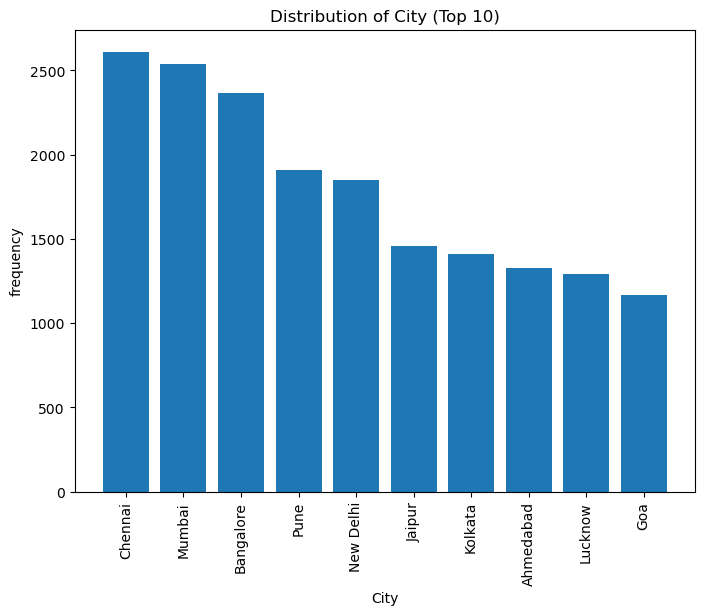

In [112]:
#For City Distribution.
top_n = 10
city_cat = df['city'].value_counts()[:top_n]
plt.figure(figsize=(8,6))
plt.bar(city_cat.index,city_cat.values)
plt.xticks(rotation=90)
plt.title('Distribution of City (Top 10)')
plt.xlabel('City')
plt.ylabel('frequency')
plt.show()

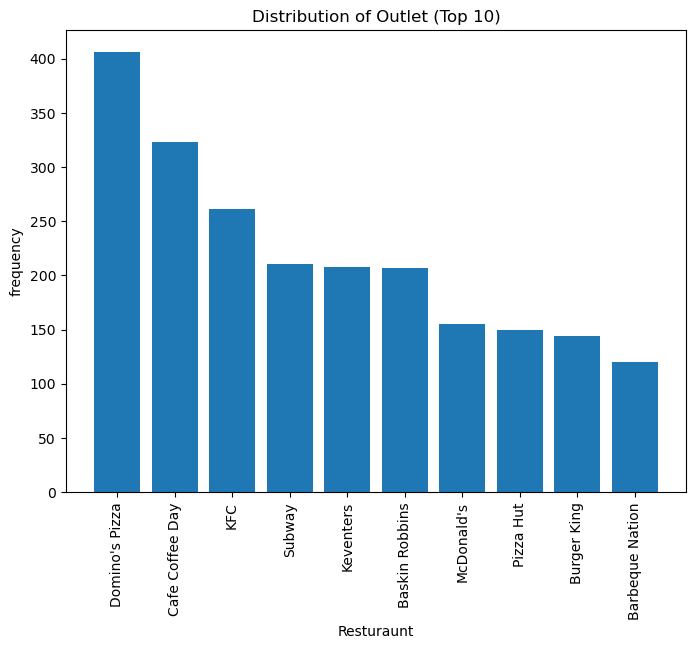

In [122]:
#For Outlets Distribution.
top_n = 10
outlet_cat = df['name'].value_counts()[:top_n]
plt.figure(figsize=(8,6))
plt.bar(outlet_cat.index,outlet_cat.values)
plt.xticks(rotation=90)
plt.title('Distribution of Outlet (Top 10)')
plt.xlabel('Resturaunt')
plt.ylabel('frequency')
plt.show()

city
Gurgaon         3.872549
Secunderabad    3.848454
Mumbai          3.795863
Hyderabad       3.775751
New Delhi       3.770005
Kolkata         3.767233
Bangalore       3.729641
Chennai         3.667764
Noida           3.651648
Navi Mumbai     3.546094
Name: aggregate_rating, dtype: float64


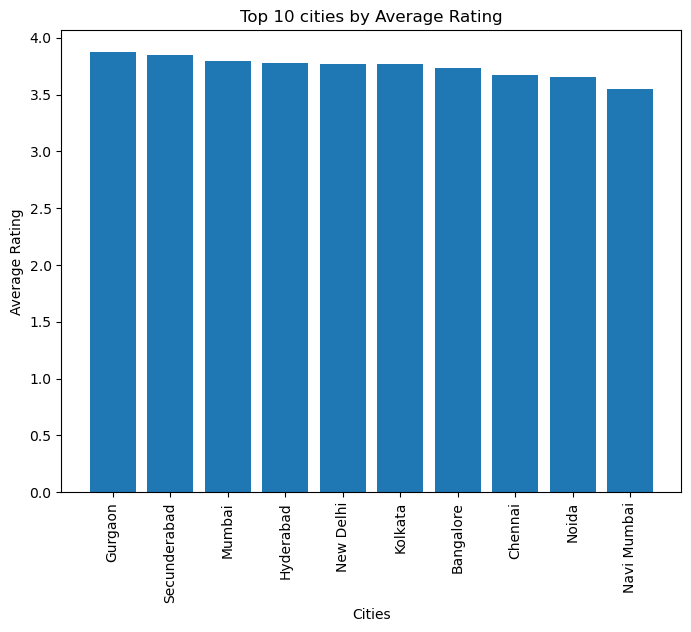

In [124]:
# Top 10 Cities by Average Rating.
city_rating = df.groupby('city')['aggregate_rating'].mean().sort_values(ascending=False)
top_cities = city_rating.head(10)
print(top_cities)
#Plotting barplot
plt.figure(figsize=(8,6))
plt.bar(top_cities.index,top_cities.values)
plt.title('Top 10 cities by Average Rating')
plt.xlabel('Cities')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)


plt.show()

city
Mumbai         1101.773050
Gurgaon        1025.384615
New Delhi      1018.305360
Hyderabad       847.322171
Bangalore       811.602537
Goa             798.828058
Noida           759.816850
Pune            753.095238
Navi Mumbai     752.382812
Jaipur          716.222527
Name: average_cost_for_two, dtype: float64


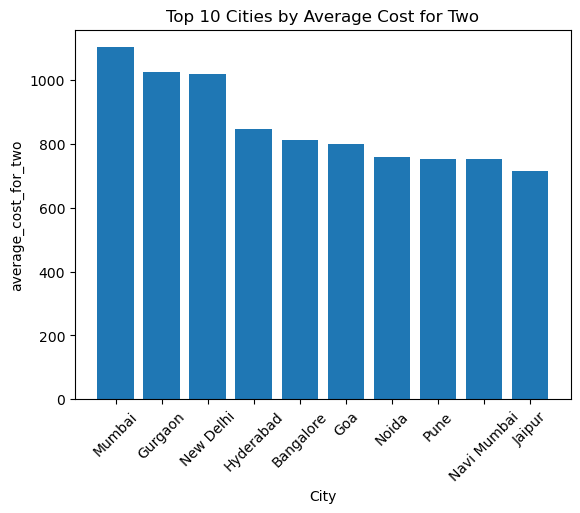

In [125]:
# Top 10 Cities by 'average_cost_for_two'.
city_rat = df.groupby('city')['average_cost_for_two'].mean().sort_values(ascending=False)
top_city = city_rat.head(10)
print(top_city)
#plotting barplot
plt.bar(top_city.index,top_city.values)
plt.title('Top 10 Cities by Average Cost for Two')
plt.xlabel('City')
plt.ylabel('average_cost_for_two')
plt.xticks(rotation=45)

plt.show()

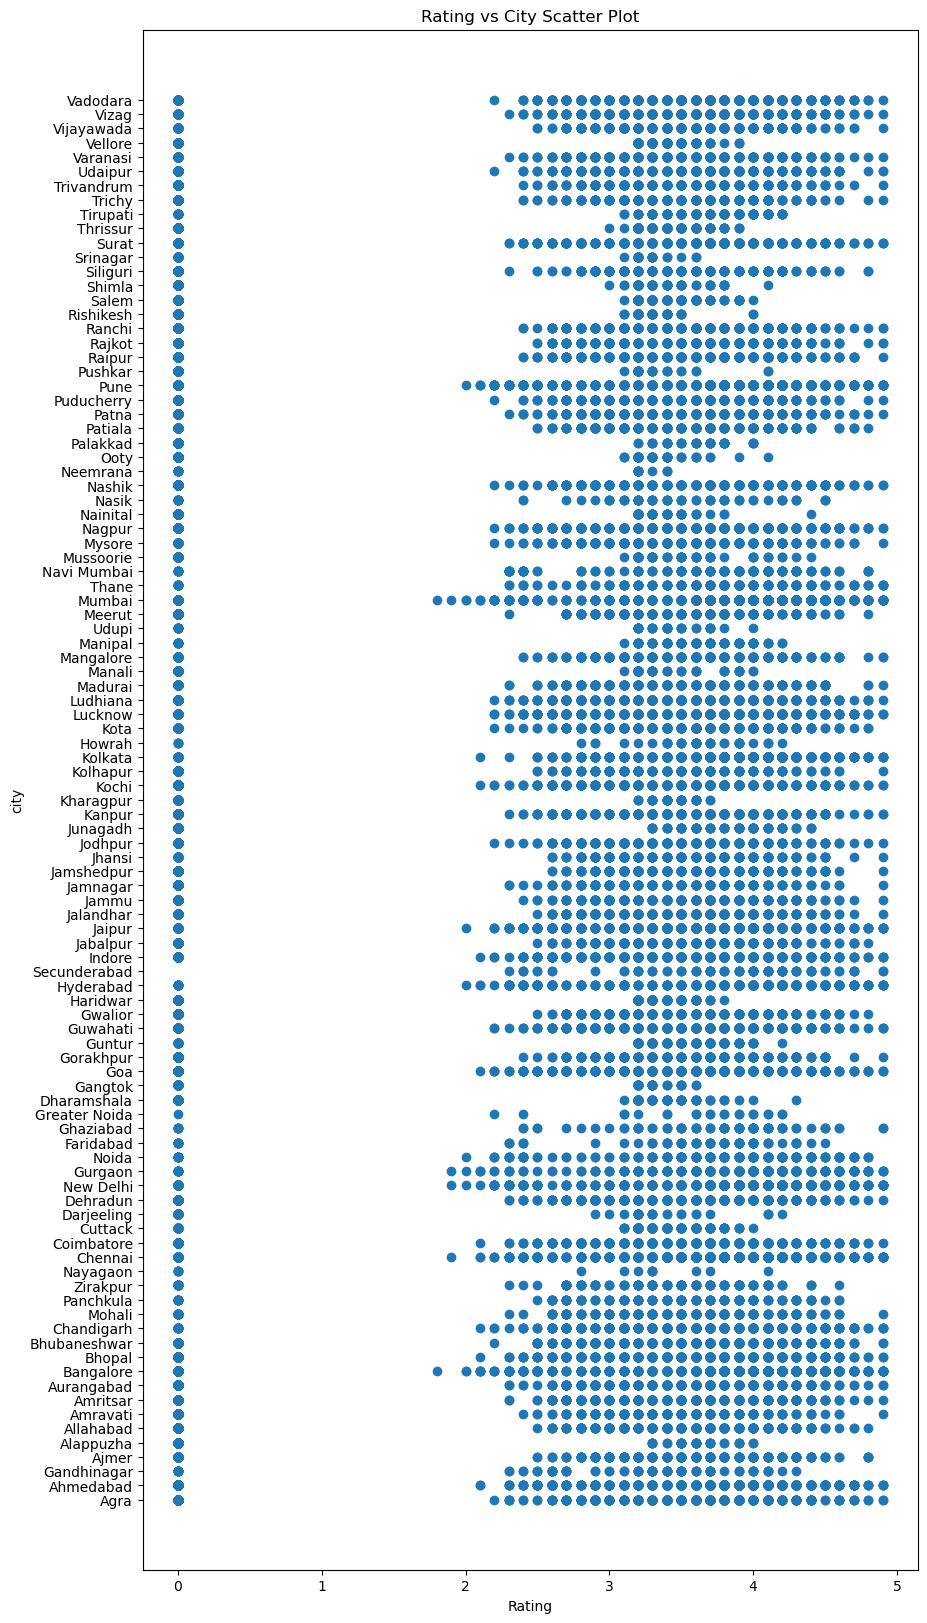

In [133]:
#Ratings and Reviews:

plt.figure(figsize=(10, 20))
plt.scatter(df['aggregate_rating'],df['city'])
plt.xlabel('Rating')
plt.ylabel('city')
plt.title('Rating vs City Scatter Plot')
plt.yticks(rotation=0, fontsize =10) 
plt.show()

city
Chennai      2612
Mumbai       2538
Bangalore    2365
Pune         1911
New Delhi    1847
Name: establishment, dtype: int64


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Chennai'),
  Text(1, 0, 'Mumbai'),
  Text(2, 0, 'Bangalore'),
  Text(3, 0, 'Pune'),
  Text(4, 0, 'New Delhi')])

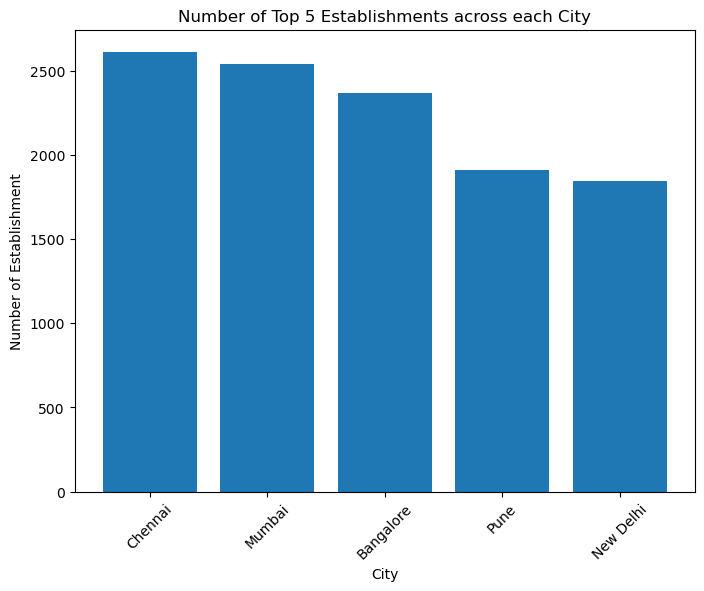

In [127]:
#Finding Number of Cities in each city to observe dining scene in each region.
locality_establishments = df.groupby('city')['establishment'].size().sort_values(ascending=False)
top_locality = locality_establishments.head(5)
print(top_locality)
#plotting bargraph
plt.figure(figsize=(8,6))
plt.bar(top_locality.index,top_locality.values)
plt.title('Number of Top 5 Establishments across each City')
plt.xlabel('City')
plt.ylabel('Number of Establishment')
plt.xticks(rotation=45)

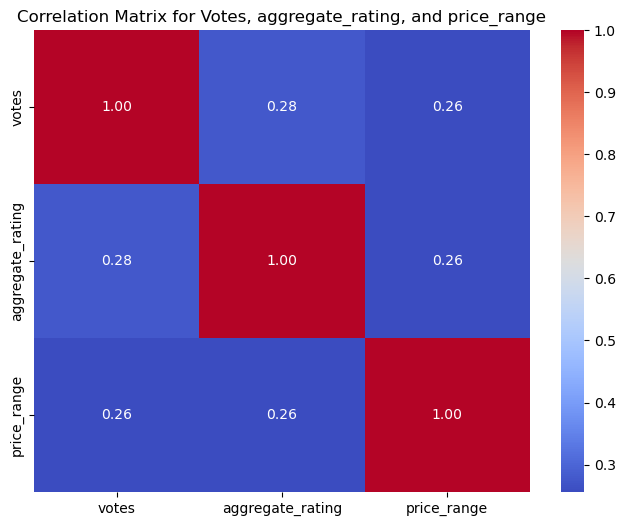

In [129]:
# Plotting the correlation matrix to determine relationship
correlation = df[['votes','aggregate_rating','price_range']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix for Votes, aggregate_rating, and price_range')
plt.show()

price_range
1    2.669837
2    3.281592
3    3.577653
4    3.701439
Name: aggregate_rating, dtype: float64


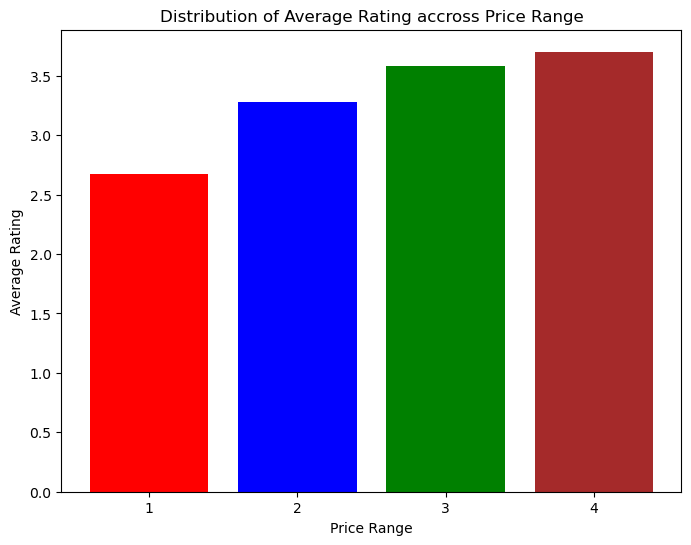

In [131]:
#Plotting Distribution of Rating by Average Price Range.
rating_range = df.groupby('price_range')['aggregate_rating'].mean()
print(rating_range)
# Plotting barcharts
plt.figure(figsize=(8,6))
colors=['red','blue','green','brown']
plt.bar(rating_range.index,rating_range.values,color=colors)
plt.title('Distribution of Average Rating accross Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
price_labels=['Low','Moderate','Expensive','Very Expensive']
plt.xticks(rating_range.index)
plt.show()

In [134]:
#Finding major competitors in each region based on cuisine, pricing, and ratings.
major_competitors = df.loc[df['cuisines'] != 'Not Available', ['city','cuisines','average_cost_for_two','aggregate_rating']]
duplicate_cities = major_competitors.drop_duplicates(subset='city')
duplicate_cities.nlargest(20,'aggregate_rating')

,city,cuisines,average_cost_for_two,aggregate_rating
15114,Amritsar,"Fast Food, Italian",500,4.9
19630,Bangalore,"Continental, North Indian, Chinese, European, ...",2100,4.9
27257,Bhubaneshwar,"Tex-Mex, Fast Food",700,4.9
53884,New Delhi,Asian,0,4.9
129079,Mangalore,"Ice Cream, Desserts, Beverages, Fast Food",250,4.9
134885,Thane,"Modern Indian, North Indian, Chinese, Momos, A...",1600,4.9
151290,Nashik,"Continental, Indian, Chinese",1000,4.9
173048,Rajkot,"North Indian, Gujarati, South Indian, Continental",700,4.9
5936,Ajmer,"Continental, Beverages, South Indian, Fast Foo...",600,4.8
11147,Allahabad,North Indian,200,4.8


In [137]:
market_gap1 = df.groupby('cuisines')['cuisines'].value_counts().sort_values()

In [138]:
market_gap1

cuisines
Fast Food, Chinese, Beverages, Arabian                  1
Italian, Arabian, Fast Food                             1
Italian, American, Turkish, Continental                 1
Italian, American, Steak, Continental, BBQ, Salad       1
Italian, American, Salad, Mexican                       1
                                                     ... 
South Indian                                         1600
Bakery                                               1618
North Indian, Chinese                                1720
Fast Food                                            2137
North Indian                                         4587
Name: count, Length: 9383, dtype: int64

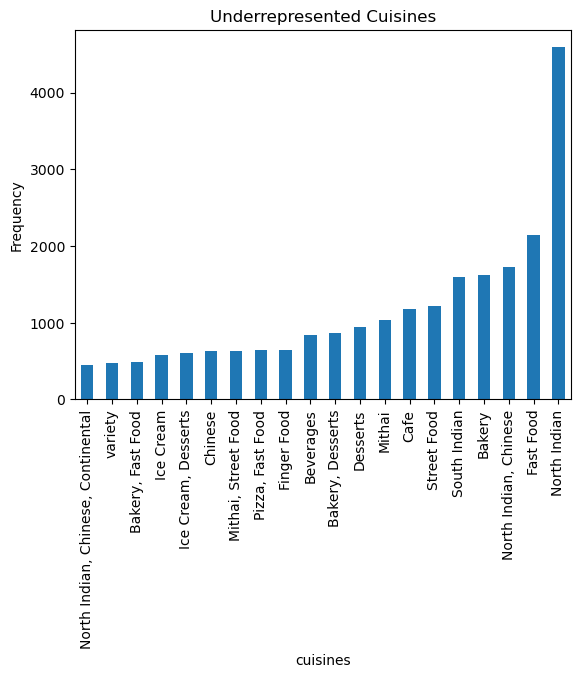

In [139]:
market_gap1.tail(20).plot(kind= 'bar')
plt.ylabel('Frequency')
plt.title('Underrepresented Cuisines')
plt.show()

#just for better representation.